# NLP: making sense of language

In [ ]:
the basics of NLP
- Topic identification
- Text classification

NLP applications include:
- Chatbots
- Translation
- Sentiment analysis
- ... 

# regular expressions

In [ ]:
- strings with a special syntax
- allow us to match patterns in other strings

applications:
- find all web links in a document
- parse email addresses, remove/replace unwanted characters

In [1]:
import re

In [2]:
re.match('abc', 'abcdef')

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [3]:
word_regex = '\w+'
re.match(word_regex, 'hi there!')

<_sre.SRE_Match object; span=(0, 2), match='hi'>

In [ ]:
common regex patterns
 pattern         matches           example
   \w+            word             'Magic'
   \d             digit               9
   \s             space              ' '
   .*           wildcard         'username74'
 + or *       greedy match        'aaaaaa'
   \S          not space         'no_spaces'
 [a-z]       lowercase group      'abcdefg'


+ at least once
* 1 or more times

Note: prefix your regex patterns with r
"\n" in Python is used to indicate a new line, 
but if you use the r prefix, 
it will be interpreted as the raw string "\n" 
that is, the character "\" followed by the character "n" - and not as a new line.

In [ ]:
re module
- split: split a string on regex
- findall: find all patterns in a string
- search: search for a pattern
- match: match an entire string or substring based on a pattern (looks for match in the beggining)

put pattern first, and string second
may return an iterator, string, or match object

In [4]:
re.split('\s+', 'Split on spaces.')

['Split', 'on', 'spaces.']

In [6]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [11]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']


In [8]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['Let', 'RegEx', 'Won', 'Can', 'Or']


In [9]:
# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces,my_string))

["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']


In [12]:
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits,my_string))

['4', '19']


# tokenization

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

In [27]:
word_tokenize("Hi there!")

['Hi', 'there', '!']

In [ ]:
nltk tokenizers
word_tokenize: tokenize a document into words
sent_tokenize: tokenize a document into sentences
regexp_tokenize: tokenize based on a regular expression pattern
TweetTokenizer: separate hashtags, mentions and lots of exclamation points!!!

In [4]:
import os

In [5]:
print("Current Directory :", os.getcwd())

Current Directory : C:\Users\tati\Documents\tera\NLP


In [12]:
with open("data\grail.txt", encoding="utf-8") as grail: 
    scene_one = grail.read()

In [11]:
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

In [46]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
print(tokenized_sent)

['ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.']


In [47]:
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'Father', 'Dragon', 'throwing', 'fifty', 'private', 'nasty', 'recover', 'routines', 'accent', 'Enchanter', 'lambs', 'previous', 'woods', 'whoever', 'Psalms', 'None', 'enemies', 'whose', 'arm', 'spoken', 'seek', 'Could', 'here', 'comin', 'dona', 'jump', 'Winter', 'Really', 'PARTY', 'Fine', 'ni', 'smashing', 'tiny-brained', 'lobbed', 'sequin', 'bang', 'suffice', 'headed', 'Silence', 'Message', 'set', 'English', 'killed', 'p', 'making', 'face', 'worried', 'sovereign', 'hast', 'Meanwhile', 'must', 'terribly', 'intermission', 'laurels', 'Princess', 'basic', 'ratios', 'witches', 'tit', 'Chickennn', 'kicked', 'pig-dogs', 'Follow', 'CHARACTERS', 'Chicken', 'Autumn', 'varletesses', 'Tim', 'father', 'taken', 'summon', 'heads', 'move', 'since', 'Robin', 'breakfast', 'MAN', '...', "'old", 'model', 'k-nnnnniggets', 'keepers', 'Galahad', 'Castle', 'elbows', 'autocracy', 'footwork', "e'er", 'force', 'major', 'entering', 'problem', 'hidden', 'sniff', '15', 'another', 'pussy', 'perpetuates', 'moistene

In [48]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [42]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<_sre.SRE_Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [43]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<_sre.SRE_Match object; span=(0, 7), match='ARTHUR:'>


# advanced tokenization

In [ ]:
- OR is represented using |
- define a group using () for a explicit set of characters
- define explicit character ranges using []
- (escape character) use \ (backward slash) in front of - (hifen) or . (period)
- use .* as a wildcard
- use + or * for a greedy match

In [44]:
match_digits_and_words = ('(\d+|\w+)')
re.findall(match_digits_and_words, 'He has 11 cats.')

['He', 'has', '11', 'cats']

Regex ranges and groups
pattern                                matches                               example
[A-Za-z]+                 upper and lowercase English alphabet            'ABCDEFghijk'
[0-9]                             numbers from 0 to 9                           9
[A-Za-z\-\.]+          upper and lowercase English alphabet, -and .      'My-Website.com'
(a-z)                               a, - and z                                'a-z'
(\s+l,)                           spaces or a comma                           ', '

In [45]:
my_str = 'match lowercase spaces nums like 12, but no commas'
re.match('[a-z0-9 ]+', my_str)

<_sre.SRE_Match object; span=(0, 35), match='match lowercase spaces nums like 12'>

In [50]:
string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
pat1 = r"\w+(\?!)"
pat2 = r"(\w+|#\d|\?|!)"
pat3 = r"(#\d\w+\?!)"
pat4 = r"\s+"

In [59]:
regexp_tokenize(string,pat2)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [61]:
tweets = 'This is the best #nlp exercise ive found online! #python', '#NLP is super fun! <3 #learning', 'Thanks @datacamp :) #nlp #python'

In [62]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0], pattern1)

['#nlp', '#python']

In [63]:
# Write a pattern that matches both mentions and hashtags
pattern2 = r"([@#]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[-1], pattern2)

['@datacamp', '#nlp', '#python']

In [64]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


In [65]:
german_text = "Wann gehen wir zum Pizza? 🍕 Und fährst du mit Über? 🚕"

In [66]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'zum', 'Pizza', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [67]:
# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


In [68]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


# plots

In [74]:
import matplotlib.pyplot as plt

In [72]:
# Split the script into lines:
lines = scene_one.split('\n')

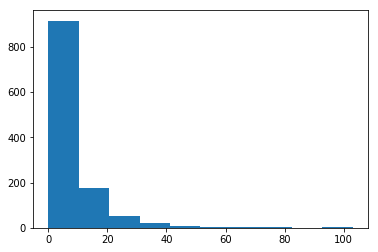

In [75]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s,"\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()